In [1]:
import seaborn as sns
from parse_touchpad_data import TouchpadData
from sklearn.mixture import BayesianGaussianMixture
from sklearn.neighbors import KernelDensity

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
legal = np.array(TouchpadData('../touchpad_capture/real_data/legal').data)
illegal = np.array(TouchpadData('../touchpad_capture/real_data/illegal').data)

nontouch = np.array(TouchpadData('../touchpad_capture/real_data/nontouches').data)
touch = np.concatenate((legal, illegal)) # Doesn't matter if it's a finger (legal) or a palm (illegal), only care if it's touching the touchpad or not


In [39]:
# There is a decent amount of data that are either data of not touching the touchpad or values right after touching the touchpad
# With a perfect feature or feature set this should be visible as a smaller gaussian to the right of a bigger gaussian that would be 
# an indicator of potentionally a good separation between good and bad data

# Plot a distribution for maximum value feature
plt.figure()
sns.kdeplot(np.max(nontouch, axis=(1,2)))
sns.kdeplot(np.max(touch, axis=(1,2)))

# Plot a distribution for mean feature
plt.figure()
sns.kdeplot(np.mean(nontouch, axis=(1,2)))
sns.kdeplot(np.mean(touch, axis=(1,2)))


# Plot a distribution for variance feature
plt.figure()
sns.kdeplot(np.var(nontouch, axis=(1,2)))
sns.kdeplot(np.var(touch, axis=(1,2)))


# Plot a distribution for sum feature
plt.figure()
sns.kdeplot(np.sum(nontouch, axis=(1,2)))
sns.kdeplot(np.sum(touch, axis=(1,2)))


# Plot a distribution for minimum value feature
plt.figure()
sns.kdeplot(np.min(nontouch, axis=(1,2)))
sns.kdeplot(np.min(touch, axis=(1,2)))

ValueError: If using all scalar values, you must pass an index

In [32]:
distribution_max = KernelDensity().fit(np.max(nontouch, axis=(1,2)).reshape(-1, 1))
distribution_mean = KernelDensity().fit(np.mean(nontouch, axis=(1,2)).reshape(-1, 1))
distribution_var = KernelDensity().fit(np.var(nontouch, axis=(1,2)).reshape(-1, 1))
distribution_sum = KernelDensity().fit(np.sum(nontouch, axis=(1,2)).reshape(-1, 1))
distribution_min = KernelDensity().fit(np.min(nontouch, axis=(1,2)).reshape(-1, 1))


[Text(0.5, 1.0, 'Prod log density')]

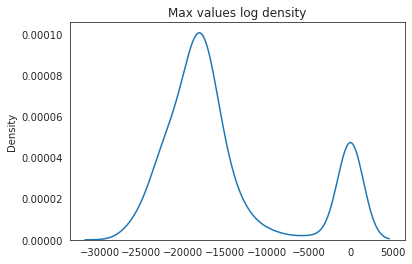

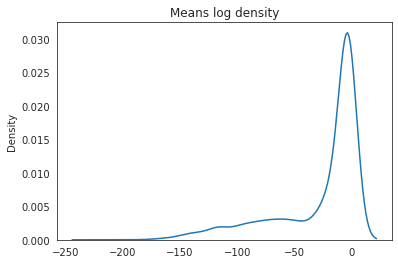

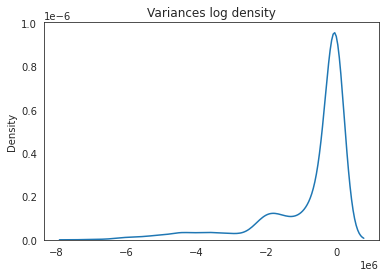

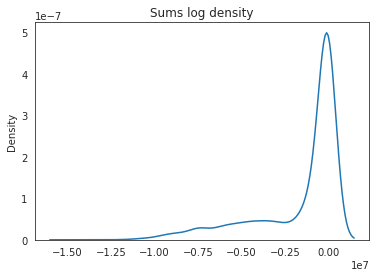

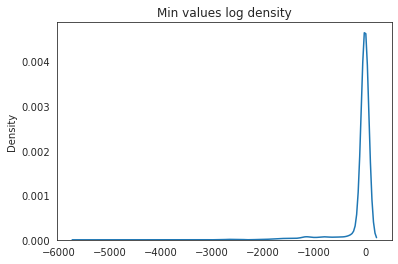

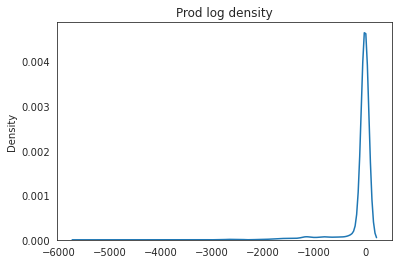

In [34]:

plt.figure()
density_max = distribution_max.score_samples(np.max(touch, axis=(1,2)).reshape(-1, 1))
sns.kdeplot(density_max).set(title="Max values log density")

plt.figure()
density_mean = distribution_mean.score_samples(np.mean(touch, axis=(1,2)).reshape(-1, 1))
sns.kdeplot(density_mean).set(title="Means log density")

plt.figure()
density_var = distribution_var.score_samples(np.var(touch, axis=(1,2)).reshape(-1, 1))
sns.kdeplot(density_var).set(title="Variances log density")

plt.figure()
density_sum = distribution_sum.score_samples(np.sum(touch, axis=(1,2)).reshape(-1, 1))
sns.kdeplot(density_sum).set(title="Sums log density")

plt.figure()
density_min = distribution_min.score_samples(np.min(touch, axis=(1,2)).reshape(-1, 1))
sns.kdeplot(density_min).set(title="Min values log density")




/home/menzac/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Prod density')]

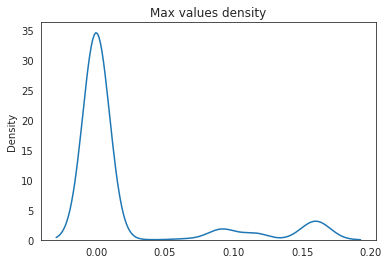

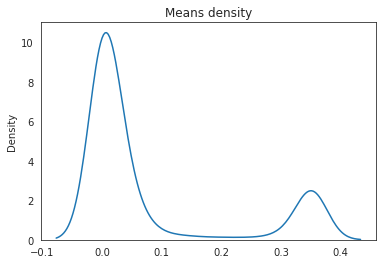

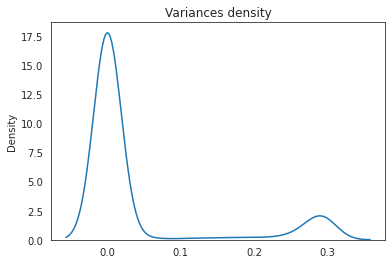

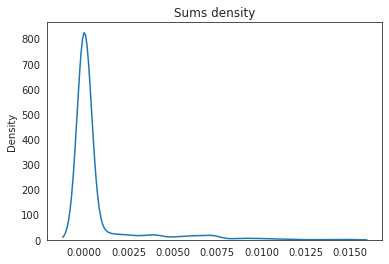

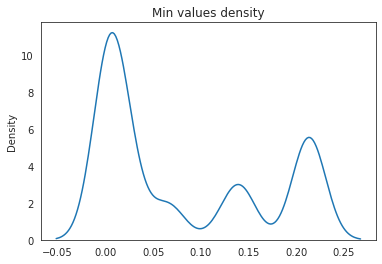

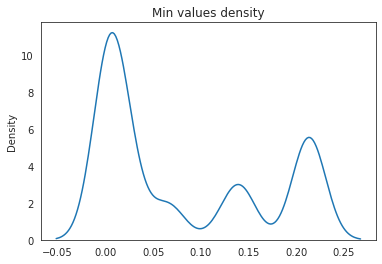

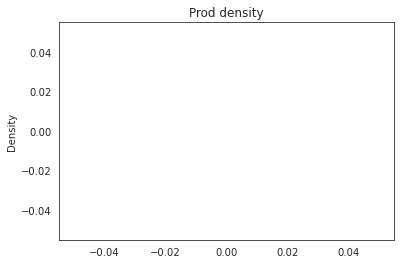

In [35]:
plt.figure()
sns.kdeplot(np.exp(density_max)).set(title="Max values density")
plt.figure()
sns.kdeplot(np.exp(density_mean)).set(title="Means density")
plt.figure()
sns.kdeplot(np.exp(density_var)).set(title="Variances density")
plt.figure()
sns.kdeplot(np.exp(density_sum)).set(title="Sums density")
plt.figure()
sns.kdeplot(np.exp(density_min)).set(title="Min values density")
plt.figure()
sns.kdeplot(np.exp(density_min)).set(title="Min values density")
plt.figure()
sns.kdeplot(np.exp(density_prod)).set(title="Prod density")

<AxesSubplot:>

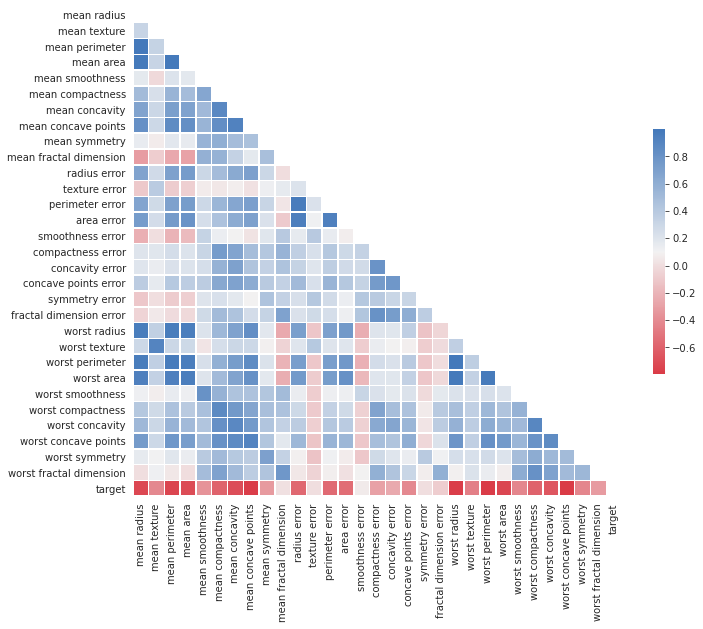

In [22]:
# library imports
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np# load the breast_cancer data set from the scikit-learn api
breast_cancer = load_breast_cancer()
data = pd.DataFrame(data=breast_cancer['data'], columns = breast_cancer['feature_names'])

data['target'] = breast_cancer['target']
data.head()# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

<AxesSubplot:>

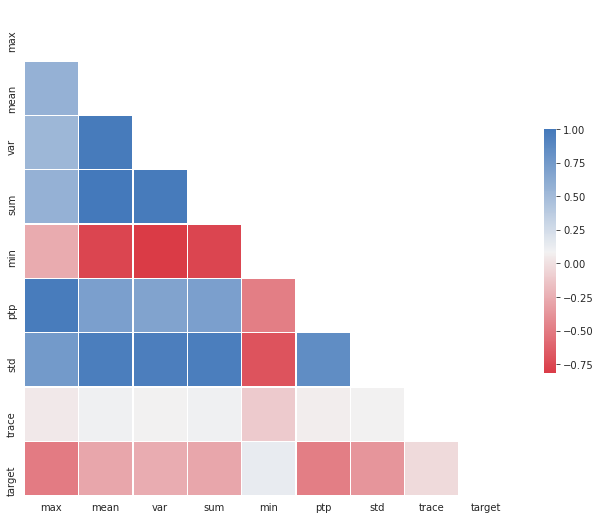

In [40]:
nontouch_features = pd.DataFrame(data={
    "max": np.max(nontouch, axis=(1,2)),
    "mean": np.mean(nontouch, axis=(1,2)),
    "var": np.var(nontouch, axis=(1,2)),
    "sum": np.sum(nontouch, axis=(1,2)),
    "min": np.min(nontouch, axis=(1,2)),
    "ptp": np.ptp(nontouch, axis=(1,2)),
    "std": np.std(nontouch, axis=(1,2)),
    "trace": np.trace(nontouch, axis1=1, axis2=2),
    "target": 1
})

touch_features = pd.DataFrame({
    "max": np.max(touch, axis=(1,2)),
    "mean": np.mean(touch, axis=(1,2)),
    "var": np.var(touch, axis=(1,2)),
    "sum": np.sum(touch, axis=(1,2)),
    "min": np.min(touch, axis=(1,2)),
    "ptp": np.ptp(touch, axis=(1,2)),
    "std": np.std(touch, axis=(1,2)),
    "trace": np.trace(touch, axis1=1, axis2=2),
    "target": 0
})

features = pd.concat((nontouch_features, touch_features))

features.head()# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = features.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [9]:
data'

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
